In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
titanic_data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\archive (19)\\titanic_train.csv", encoding='latin-1')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:

# Data preprocessing
# Drop irrelevant columns and rows with missing 'Embarked' values
titanic_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Encode categorical variables (e.g., 'Sex' and 'Embarked')
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Extract Title from Name and create a new feature 'Title'
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

# Impute missing 'Age' values based on 'Title' median
age_median_by_title = titanic_data.groupby('Title')['Age'].median()
titanic_data['Age'] = titanic_data.apply(lambda row: age_median_by_title[row['Title']] if np.isnan(row['Age']) else row['Age'], axis=1)

# Split the data into features (X) and target (y)
X = titanic_data.drop(['Survived', 'Name', 'Title'], axis=1)
y = titanic_data['Survived']

# Scale numerical features
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7921348314606742
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.72      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Confusion Matrix:
 [[91 18]
 [19 50]]


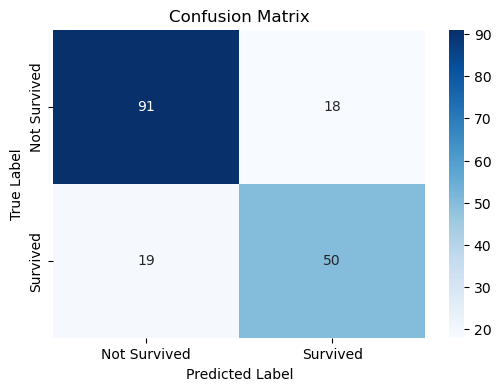

In [23]:

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


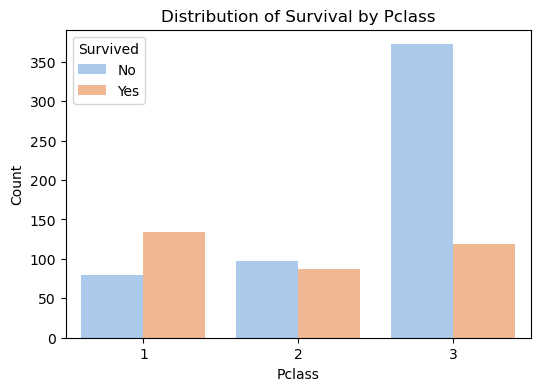

In [25]:

# Plot the distribution of survival by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='pastel')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Survival by Pclass')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

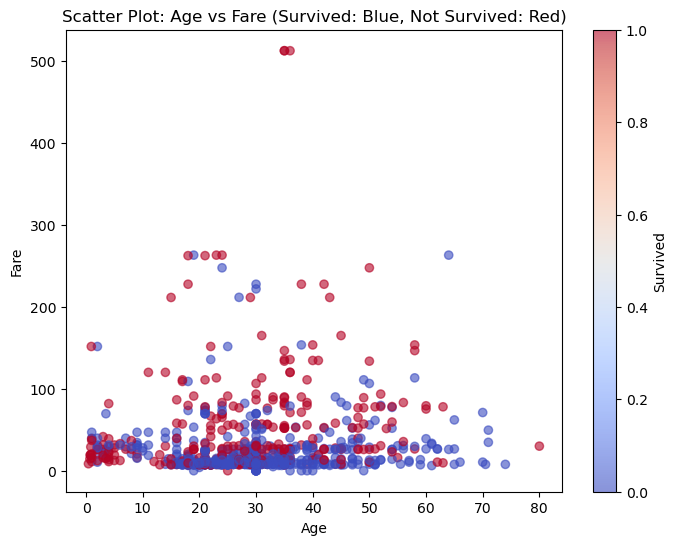

In [26]:

# Create a scatter plot to visualize the relationship between 'Age' and 'Fare'
plt.figure(figsize=(8, 6))
plt.scatter(titanic_data['Age'], titanic_data['Fare'], c=titanic_data['Survived'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare (Survived: Blue, Not Survived: Red)')
plt.colorbar(label='Survived')
plt.show()